# Fluidinámica computacional (Sesión 01)


<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">


**CINVESTAV Unidad Saltillo**

**Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Enero - Junio 2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

In [1]:
using Plots
using LaTeXStrings

# Clasificación matemática de ecuaciones diferenciales parciales

La ecuación general de transporte de un escalar es una ecuación diferencial parcial de segundo orden, que gobierna la variación espacial y temporal de la variable $\phi$.

$$
\underbrace{\frac{\partial}{\partial t} \left( \rho \phi \right)}_{\mathrm{transitorio}} + \underbrace{\mathbf{\nabla \cdot} \left( \rho \mathbf{u} \phi \right)}_{\mathrm{advectivo}} = \underbrace{\mathbf{\nabla \cdot} \left( \Gamma \mathbf{\nabla} \phi \right)}_{\mathrm{difusivo}} + \underbrace{S_{\phi}}_{\mathrm{fuente}}
$$

<div class="alert alert-warning">

**Linealialidad o no-linealidad de la ecuación**

La ecuación diferencial parcial es no lineal cuando las propiedades $\rho$ y $\Gamma$, o el termino fuente $S_{\phi}$ son funciones de $\phi$.
</div>

**Ecuación diferencial parcial general de segundo orden:**

Para fines didácticos se considera la ecuación diferencial parcial de segundo orden, dada por:

$$
A \frac{\partial^2 \phi}{\partial x^2} + B \frac{\partial^2 \phi}{\partial x \partial y} + C \frac{\partial^2 \phi}{\partial y^2} + D \frac{\partial \phi}{\partial x} + E \frac{\partial \phi}{\partial y} + F \phi + G = 0
$$

Los coeficientes $A, B, C, D, E, F, G$ son funciones de la posición $(x, y)$, pero no de la variable transportada $\phi$.

**A continuación se analiza el comportamiento de esta ecuación, ignorando las no-linealidades:**

Como se muestra en la ***Tabla 1***, el comportamiento de la ecuación se puede clasificar de acuerdo con el signo del discriminante:

$$
\mathcal{D} = B^2 - 4AC
$$

***Tabla 1: Clasificación matemática de ecuaciones diferenciales parciales.***

| $B^2 - 4AC$      | Tipo        | Ejemplo      | Comentario |
| :---:       |    :----:   | :---         | :---  |
| $< 0$       | Elíptica    | $\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0$ | **Ecuación de Laplace** (régimen estacionario)  |
| $= 0$       | Parabólica   | $\frac{\partial \phi}{\partial t} = \alpha \frac{\partial^2 \phi}{\partial x^2}$ | **Ecuación de difusión** (régimen transitorio) |
| $> 0$       | Hiperbólica  | $\frac{\partial^2 u}{\partial x^2} = \frac{1}{c^2} \frac{\partial^2 u}{\partial t^2}$   | **Ecuación de onda**  (régimen transitorio) |

## Ecuación Elíptica

Se considera la ecuación de conducción de calor 1D en régimen estacionario:

$$
\frac{\partial}{\partial x} \left(\lambda \frac{\partial T}{\partial x} \right) = 0
$$

Con condiciones a la frontera:

$$
T(0) = T_0
$$

$$
T(L) = T_L
$$

Si se considera $\lambda$ constante, el perfil de temperatura que se obtiene al resolver la ecuacion es:

$$T(x) = T_0 + \frac{\left(T_L - T_0  \right)}{L} x$$

In [2]:
function heatSteadyProfile(x, L, T0, TL)
	@. T0 + (TL - T0)/L * x
end

heatSteadyProfile (generic function with 1 method)

### Ilustración de la solución de la ecuación

In [11]:
# Parámetros
L = 1.0 # tamaño del dominio [m]
dx = 0.1 # espacio entre nodos [m]
T0 = 50. # Temperatura en x=0, [K]
TL = 100. # Temperatura en x=L, [K]

100.0

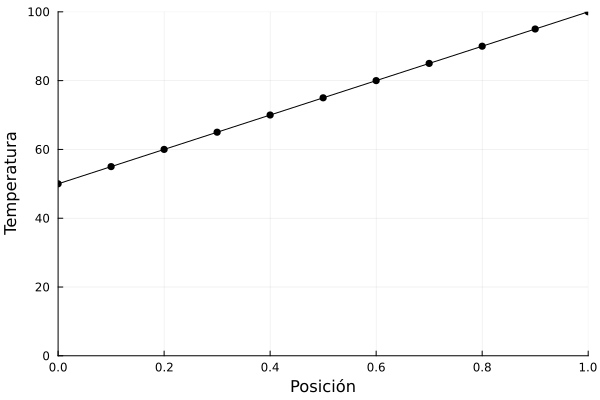

In [12]:
# Mallado y temperatura en nodos
x = collect(0.0:dx:L)
T = heatSteadyProfile(x, L, T0, TL)

### Grafico
l1 = plot(x, T, color = :black, legend=false)
s1 = scatter!(x, T, color = :black, legend=false)
xlabel!("Posición")
ylabel!("Temperatura")
xlims!(0, 1)
ylims!(0, 100)

### Propiedades

<div class="alert alert-info">

Este problema simple ilustra algunas propiedades importantes de las ecuaciones diferenciales parciales elípticas:

1. Las temperaturas en las fronteras tienen influencia sobre la temperatura en cualquier punto $x$ del dominio de cálculo.

2. En ausencia de términos fuente, $T(x)$ esta delimitada por las temperaturas en las fronteras.

</div>

## Ecuación Parabólica

Se considera la ecuación de conducción de calor 1D en régimen transitorio. En el caso cuando $\lambda$, $\rho$, y $c$ son constantes, la ecuación se escribe en términos de la temperatura como:

$$
\frac{1}{\alpha} \frac{\partial T}{\partial t} =  \frac{\partial^2 T}{\partial x^2}
$$

Condiciones iniciales y a la frontera:

$$
T(x, 0) = T_i
$$

$$
T(-L, t) = T_0
$$

$$
T(L, t) = T_0
$$

**Solución analítica:**

La solución analítica a este problema puede obtenerse mediante el método de series de Fourier, resolviendo la ecuación de conducción de calor adimensional:

$$
\frac{\partial \theta^*}{\partial \mathrm{Fo}} = \frac{\partial^2 \theta^*}{\partial {x^*}^2}
$$

Donde:

$$\theta^* = \frac{\theta}{\theta_i} = \frac{T - T_{\infty}}{T_i - T_{\infty}}$$

$$x^* = \frac{x}{L}$$

$$\mathrm{Fo} = \frac{\alpha t}{L^2}$$

**Solución mediante series de Fourier:**

$$
\theta^* = \frac{T - T_{\infty}}{T_i - T_{\infty}} = \sum_{n=1}^{\infty} A_n \exp \left( -\xi_n^2 \mathrm{Fo} \right) \cos \left( \xi_n x^* \right)
$$

$$
A_n = \frac{2 \sin ({\xi_n})}{\xi_n + \sin(\xi_n) \cos(\xi_n)}
$$

En esta ecuación, los términos $\xi_n$ en la suma infinita, son las raíces positivas de la ecuación trascendental $\xi \tan(\xi) = \mathrm{Bi}$. 

$$\mathrm{Bi} = \frac{h \,L}{\lambda}$$

Las condiciones de frontera especificadas corresponden al caso límite $\mathrm{Bi} \rightarrow \infty$.

In [5]:
function heatTransientProfile(x, Fo, nRoots=20)

	theta = 0.0

	for i = 1:nRoots
		xi = @. π * (i - 0.5) # eigenvalues for Bi -> \infty
		An = @. (2.0 * sin(xi)) / (xi + sin(xi)*cos(xi))
		theta = @. theta + An * exp(-xi^(2.0) * Fo) * cos(xi * x)
	end

	return theta
end

heatTransientProfile (generic function with 2 methods)

### Ilustración de la solución de la ecuación

In [6]:
# Parámetros
L = 1.0 # tamaño del dominio [m]
dx = 0.01 # espacio entre nodos [m]
maxFo = 5 # valor máximo de número de Fourier
ΔFo = 0.1 # espacio entre valores de número de Fourier
nRoots = 20 # número de raíces a considerar en la ecuación trascendental

20

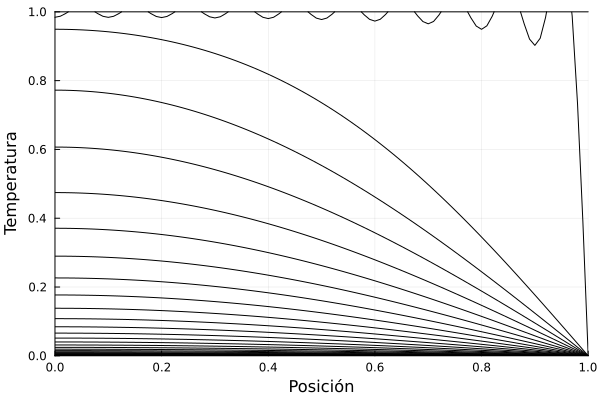

In [7]:
# Mallado y temperatura en nodos
x = collect(0.0:dx:L)


T = heatSteadyProfile(x, L, 1, 1)
plot(x, T, color=:black, legend=false)

### Grafico
for Fo in 0:ΔFo:maxFo
    T = heatTransientProfile(x, Fo, nRoots)
    plot!(x, T, color = :black, legend=false)
    #scatter!(x, T, color = :black, legend=false)
end
xlabel!("Posición")
ylabel!("Temperatura")
xlims!(0, 1)
ylims!(0, 1)

### Propiedades

<div class="alert alert-info">

Este problema simple ilustra algunas propiedades importantes de las ecuaciones diferenciales parciales parabólicas:

1. Las temperaturas en las fronteras tienen influencia sobre la temperatura en cualquier punto $x$ del dominio de cálculo.

2. En ausencia de términos fuente, $T(x)$ esta delimitada por las temperaturas en las fronteras.

3. Sólo se requieren las condiciones iniciales del problema. Estas condiciones tienen influencia en las temperaturas futuras para cada posición $x$ en el dominio de cálculo.

4. Se alcanza el rémine estacionario cuando $t \rightarrow \infty$. En ese momento la solución se hace independiente de las condiciones iniciales, y exhibe un comportamiento de ecuación elíptica.

</div>

### Ejercicio:

La difusividad térmica, $\alpha$, tiene unidades $[\mathrm{m^2.s^{-1}}]$, y esta definida en funcion de tres propiedades termofísicas de un material: $\lambda$, $\rho$, $c$.

<details>
<summary><b>Nomenclatura</b></summary>

<div class="alert alert-info">

**$\alpha$**: difusividad térmica, en $[\mathrm{m^2.s^{-1}}]$.

**$\lambda$**: conductividad térmica, en $[\mathrm{W.m^{-1}.K^{-1}}]$.

**$\rho$**: densidad, en $[\mathrm{kg.m^{-3}}]$.

**$c$**: capacidad calorífica específica, en $[\mathrm{J.kg^{-1}.K^{-1}}]$.

</div>

</details>

Obtenga mediante un analisis dimensional la relación $\alpha(\lambda, \rho, c)$ que define la difusividad térmica.

<details>
<summary><b>Respuesta</b></summary>

<div class="alert alert-success">

La ecuación que da la relación $\alpha(\lambda, \rho, c)$ es:

$$
\alpha \left[\frac{\mathrm{m^2}}{\mathrm{s}}\right] = \frac{\lambda \left[\frac{\mathrm{W}}{\mathrm{m\,K}} \right]}{\rho \left[\frac{\mathrm{kg}}{\mathrm{m^3}}\right] c\left[\frac{\mathrm{J}}{\mathrm{kg\,K}}\right]} = \frac{\lambda \left[\frac{\mathrm{J}}{\mathrm{s\,m\,K}} \right]}{\rho \left[\frac{\mathrm{kg}}{\mathrm{m^3}}\right] c\left[\frac{\mathrm{J}}{\mathrm{kg\,K}}\right]}
$$

Aplicando la regla de división de fracciones mixtas (regla de la herradura), se comprueba la consistencia de dimensiones:

$$
\alpha \left[\frac{\mathrm{m^2}}{\mathrm{s}}\right] = \alpha \left[\frac{\cancel{\mathrm{J\,kg\,K}}\,\mathrm{m^3}}{\cancel{\mathrm{J\,kg\,K}}\,\mathrm{m\,s}}\right]
$$

</div>
</details>

## Ecuación hiperbólica

Se considera la ecuación que describe el flujo de un fluido en un canal. 

La velocidad del fluido $u_x > 0$ es constante. 

El fluido en la entrada del canal esta a temperatura $T_0$. 

$$
\frac{\partial}{\partial t} \left(\rho c \,T \right) + \frac{\partial}{\partial x} \left(\rho c \,u_x T \right) = 0
$$

Condiciones iniciales y a la frontera:

$$
T(x, 0) = T_i
$$

$$
T(x \leq 0, t) = T_0
$$

La solución esta dada por:

$$
T(x,t) = \left\{ \begin{matrix} 
T_i \quad \forall \,\, t<\frac{x}{u_x} \\ \\
T_0 \quad \forall \,\, t\geq \frac{x}{u_x}
\end{matrix} \right.
$$

In [8]:
function fluidChannelTemp(x, t, U , T0, Ti)
	@. (t < x/U)*Ti + (t>= x/U)*T0 + (U == 0)*Ti
end

fluidChannelTemp (generic function with 1 method)

### Ilustración de la solución de la ecuación

In [9]:
# Parámetros
L = 100.0 # tamaño del dominio [m]
dx = 0.1 # espacio entre nodos [m]
u = 1.0 # velocidad de propagación [m/s]
maxt = 75 # valor máximo de tiempo [s]
Δt = 25 # espacio entre valores de número de Fourier
Ti = 25 # Temperatura inicial del canal [K]
T0 = 75 # Temperatura aguas arriba [K]

75

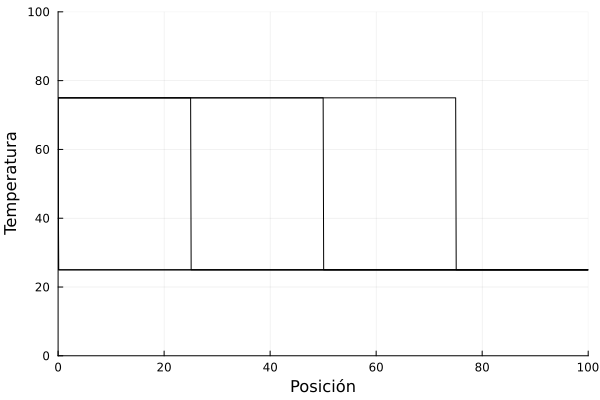

In [10]:
# Mallado y temperatura en nodos
x = collect(0.0:dx:L)


T = fluidChannelTemp(x, 0.0, u, T0, Ti)
plot(x, T, color=:black, legend=false)

### Grafico
for t in 0:Δt:maxt
    T = fluidChannelTemp(x, t, u, T0, Ti)
    plot!(x, T, color = :black, legend=false)
    #scatter!(x, T, color = :black, legend=false)
end
xlabel!("Posición")
ylabel!("Temperatura")
xlims!(0, 100)
ylims!(0, 100)

### Propiedades

<div class="alert alert-info">

Este problema simple ilustra algunas propiedades importantes de las ecuaciones diferenciales parciales hiperbólicas:

1. La condición de frontera en la entrada $(x=0)$ afecta la solución en el dominio de calculo. La condición a la salida no afecta la solución en el dominio de calculo. 

2. La condición a la entrada se propaga a una velocidad finita, $U$.

3. La condición a la entrada se percibe en la posición $x$ hasta que $t\ge x/U$.

</div>

## Implicaciones computacionales

#### Coordenadas en dos sentidos (two-way coordinates)



Las condiciones de frontera se propagan en todos los sentidos desde las fronteras, por ejemplo en las ecuaciones elípticas.

Entonces, se debe almacenar en la computadora información acerca de todo el dominio.

### Coordenadas en un sentido (one-way coordinates)

Las condiciones iniciales se propagan en un sentido, por ejemplo en las ecuaciones hiperbólicas.

Entonces, se puede almacenar en la computadora información acerca de solo dos nodos consecutivos.

# Condiciones de Frontera

## Dirichlet

La variable dependiente es conocida.

Ejemplos:

- Velocidad de un fluido en la pared de una tubería solida, $u_z=0$.
- Temperatura fija en una pared, $T=T_{wall}$.
- Velocidad de entrada de un fluido en una tubería, $\mathbf{u_{in}}$. 
- Temperatura de un fluido a la entrada de una tubería, $T_{in}$.
- Concentración conocida de una especie química a la entrada de un reactor, $Y_{i, in}=0.5$.
- Presión a la salida de una tubería, $p_0$.

## Neumann

Se conoce la derivada de la variable dependiente.

Ejemplos:

- La derivada de la velocidad en el eje de una tubería cilíndrica, $\frac{du_z}{d_r}=0$.
- Condiciones adiabáticas en la frontera, $\nabla q = 0$.
- Gradiente de velocidad normal a la superficie de la salida de una tubería, $\mathbf{\nabla_n u} = 0$.

## Cauchy

Se conoce una función de la variable dependiente y su derivada. Por ejemplo:

- Condición convectiva en una superficie solida, $\lambda \frac{\partial T}{\partial r} = -h(T - T_f)$